In [1]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('../datasets/housing.csv', header=None, 
                 delimiter=r"\s+", names=column_names)

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [5]:
y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1)

rft = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rft, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5-교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5-교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5-교차 검증의 평균 RMSE scores : {0: .3f}'.format(avg_rmse))


5-교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5-교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5-교차 검증의 평균 RMSE scores :  4.423


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg]

for model in models:
    # if model_nam == 'dt_reg':
    #     model = dt_reg
    # elif model_nam == 'rf_reg':
    #     model = rf_reg
    # elif model_nam == 'gb_reg':
    #     model = gb_reg
    neg_mse_scores = cross_val_score(
        model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    # print(f'{model_nam} 의 예측한 5-folds의 평균 RMSE : {avg_rmse: .3f}')
    print( '예측한 5-folds의 평균 RMSE : {0: .3f}'.format(avg_rmse))




예측한 5-folds의 평균 RMSE :  5.978
예측한 5-folds의 평균 RMSE :  4.423
예측한 5-folds의 평균 RMSE :  4.269


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

models = ['dt_reg', 'rf_reg', 'gb_reg']

for model_nam in models:
    if model_nam == 'dt_reg':
        model = dt_reg
    elif model_nam == 'rf_reg':
        model = rf_reg
    elif model_nam == 'gb_reg':
        model = gb_reg
    neg_mse_scores = cross_val_score(
        model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'{model_nam} 의 예측한 5-folds의 평균 RMSE : {avg_rmse: .3f}')




dt_reg 의 예측한 5-folds의 평균 RMSE :  5.978
rf_reg 의 예측한 5-folds의 평균 RMSE :  4.423
gb_reg 의 예측한 5-folds의 평균 RMSE :  4.269


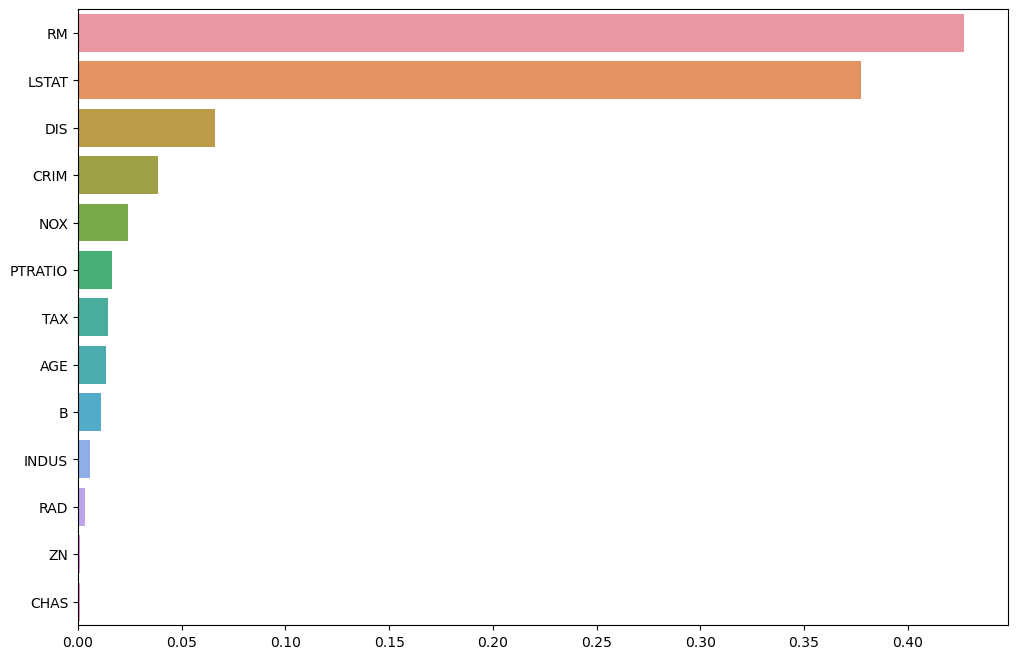

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest 회귀 모델 생성 및 학습
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

# 각 피처의 중요도를 Series로 변환
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)

# 중요도에 따라 내림차순으로 정렬
feature_series = feature_series.sort_values(ascending=False)

# 중요도 시각화 (막대 그래프)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_series, y=feature_series.index)
plt.show()